In [1]:
## Loading samples, store data in dataframe
import pandas as pd
%run data_prep.ipynb

('top_xl_7', 'antitop_xl_7', 'cosTheta1r_7', 'cosTheta2r_7', 'rmin0_7', 'rmin1_7', 'sT_met_7', 'MT2r_7', 'weight_7', 'channel_7', 'MCTruth_MP_7', 'MCTruth_WP_7')
('top_xl_7', 'antitop_xl_7', 'cosTheta1r_7', 'cosTheta2r_7', 'rmin0_7', 'rmin1_7', 'sT_met_7', 'MT2r_7', 'weight_7', 'channel_7', 'MCTruth_MP_7', 'MCTruth_WP_7')


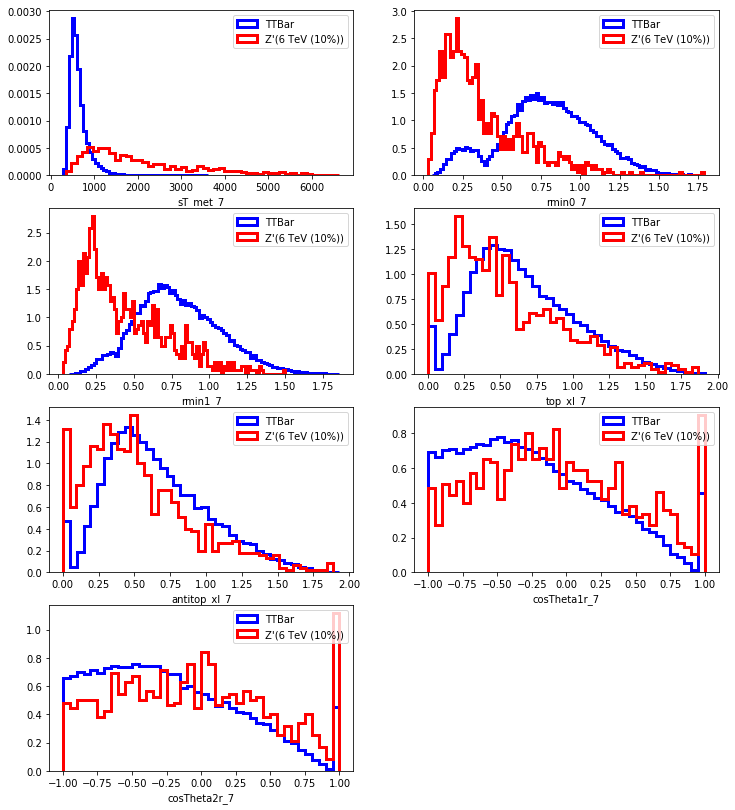

In [2]:
import math
seed = 1234
np.random.seed(seed)

df = {}
VARS = [ 'sT_met_7', 'rmin0_7', 'rmin1_7','top_xl_7','antitop_xl_7','cosTheta1r_7','cosTheta2r_7']
BINS = {'sT_met_7':50, 'rmin0_7':100, 'rmin1_7':100,'top_xl_7':40,'antitop_xl_7':40, 'cosTheta1r_7':40, 'cosTheta2r_7':40,}

for k in filename.keys():
    df[k] = pd.DataFrame(params[k],columns=VARS)
    df[k] = df[k][df[k]['sT_met_7'] >=0]

df[('bkg','mm')]['label'] = np.zeros(len(df[('bkg','mm')]))
df[('sig','mm')]['label'] = np.ones(len(df[('sig','mm')]))

    
#print(sorted(df.keys()))    
#print (df[('sig','mm')].iloc[-10:])
#print (df[('bkg','mm')].iloc[-10:])

fig, ax = plt.subplots(int(math.ceil(len(VARS)/2.0)), 2, figsize=(12,14))
if len(VARS)%2 == 1 :  
    fig.delaxes(ax[int(math.ceil(len(VARS)/2.0))-1,1])

for i in range(len(VARS)):
    ax = plt.subplot(int(math.ceil(len(VARS)/2.0)), 2, i+1)
    sns.distplot(df[('bkg','mm')][:][VARS[i]], norm_hist=True, kde=False,
             label="TTBar", bins = BINS[VARS[i]],
             hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "blue"})
    sns.distplot(df[('sig','mm')][:][VARS[i]], norm_hist=True, kde=False,
             label="Z'(6 TeV (10%))", bins = BINS[VARS[i]],
             hist_kws={"histtype": "step", "linewidth": 3, "alpha": 1, "color": "red"})
    ax.legend(loc="upper right")

plt.show()    



In [3]:
## DNN architecture 
# baseline keras model
from keras.models import Sequential, Model
from keras.optimizers import SGD
from keras.layers import Input, Activation, Dense, Convolution2D, MaxPooling2D, Dropout, Flatten
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from keras import regularizers
from IPython.display import Image


Using TensorFlow backend.


7
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 14)                112       
_________________________________________________________________
dropout_1 (Dropout)          (None, 14)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 14)                210       
_________________________________________________________________
dropout_2 (Dropout)          (None, 14)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 15        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


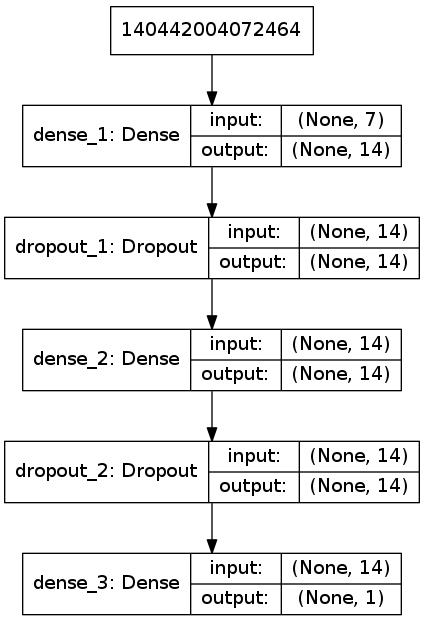

In [4]:
# Case 1: 2 layers, nodes = twice * features

# Number of parameters: each neuron has one bias parameter and one weight per input 
# N = n_neurons * ( n_inputs + 1) 
# layer 1 : 14 * (7+1) = 112
# layer 2 : 14 * (14+1) = 210
# output : 1 * (14+1) = 15


NDIM = len(VARS)
print(NDIM)
model_2l_2f = Sequential()

model_2l_2f.add(Dense(NDIM*2, activation = "relu", input_shape=(NDIM, ), kernel_regularizer= regularizers.l2(0.01)))
model_2l_2f.add(Dropout(0.2, noise_shape=None, seed=None))
model_2l_2f.add(Dense(NDIM*2, activation = "relu", kernel_regularizer= regularizers.l2(0.01)))
model_2l_2f.add(Dropout(0.2, noise_shape=None, seed=None)) 
model_2l_2f.add(Dense(1, activation = "sigmoid"))


# compile the model
model_2l_2f.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_2l_2f.summary()
plot_model(model_2l_2f, to_file='model_2l_2f_plot.png',
           show_shapes=True, show_layer_names=True)
Image(retina=True, filename='model_2l_2f_plot.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 21)                168       
_________________________________________________________________
dropout_3 (Dropout)          (None, 21)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 21)                462       
_________________________________________________________________
dropout_4 (Dropout)          (None, 21)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 22        
Total params: 652
Trainable params: 652
Non-trainable params: 0
_________________________________________________________________


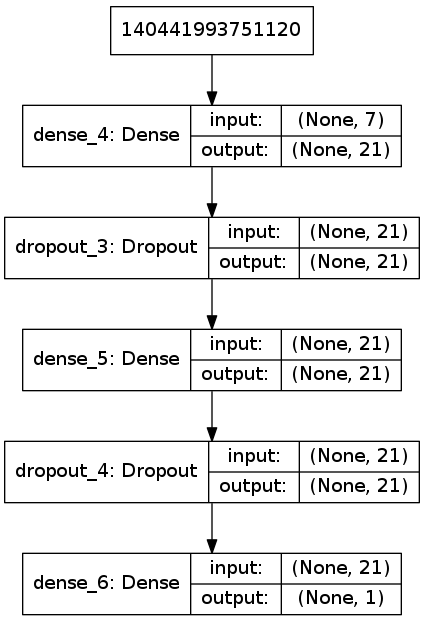

In [5]:
# Case 2: 2 layers, nodes = three * features

# Number of parameters: each neuron has one bias parameter and one weight per input 
# N = n_neurons * ( n_inputs + 1) 
# layer 1 : 21 * (7+1) = 168
# layer 2 : 21 * (21+1) = 462
# output : 1 * (21+1) = 22

model_2l_3f = Sequential()

model_2l_3f.add(Dense(NDIM*3, activation = "relu", input_shape=(NDIM, ), kernel_regularizer= regularizers.l2(0.01)))
model_2l_3f.add(Dropout(0.2, noise_shape=None, seed=None))
model_2l_3f.add(Dense(NDIM*3, activation = "relu", kernel_regularizer= regularizers.l2(0.01)))
model_2l_3f.add(Dropout(0.2, noise_shape=None, seed=None)) 
model_2l_3f.add(Dense(1, activation = "sigmoid"))


# compile the model
model_2l_3f.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_2l_3f.summary()
plot_model(model_2l_3f, to_file='model_2l_3f_plot.png',
           show_shapes=True, show_layer_names=True)
Image(retina=True, filename='model_2l_3f_plot.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 28)                224       
_________________________________________________________________
dropout_5 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 28)                812       
_________________________________________________________________
dropout_6 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 29        
Total params: 1,065
Trainable params: 1,065
Non-trainable params: 0
_________________________________________________________________


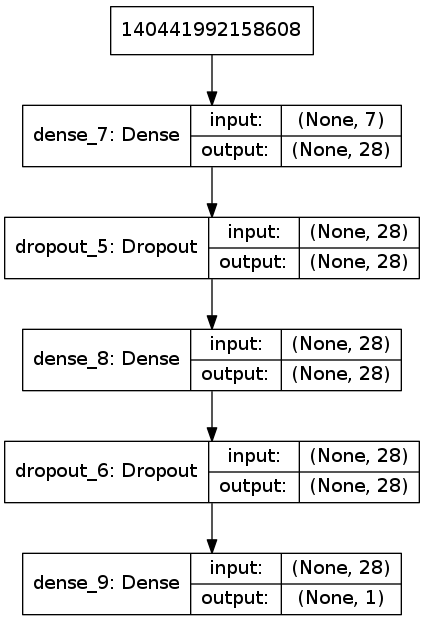

In [6]:
# Case 3: 2 layers, nodes = four* features without regulizer

# Number of parameters: each neuron has one bias parameter and one weight per input 
# N = n_neurons * ( n_inputs + 1) 
# layer 1 : 28 * (7+1) = 224
# layer 2 : 28 * (28+1) = 812
# output : 1 * (28+1) = 29



model_2l_4f = Sequential()

model_2l_4f.add(Dense(NDIM*4, activation = "relu", input_shape=(NDIM, )))
model_2l_4f.add(Dropout(0.2, noise_shape=None, seed=None))
model_2l_4f.add(Dense(NDIM*4, activation = "relu"))
model_2l_4f.add(Dropout(0.2, noise_shape=None, seed=None)) 
model_2l_4f.add(Dense(1, activation = "sigmoid"))


# compile the model
model_2l_4f.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_2l_4f.summary()
plot_model(model_2l_4f, to_file='model_2l_4f_plot.png',
           show_shapes=True, show_layer_names=True)
Image(retina=True, filename='model_2l_4f_plot.png')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 28)                224       
_________________________________________________________________
dropout_7 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 28)                812       
_________________________________________________________________
dropout_8 (Dropout)          (None, 28)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 29        
Total params: 1,065
Trainable params: 1,065
Non-trainable params: 0
_________________________________________________________________


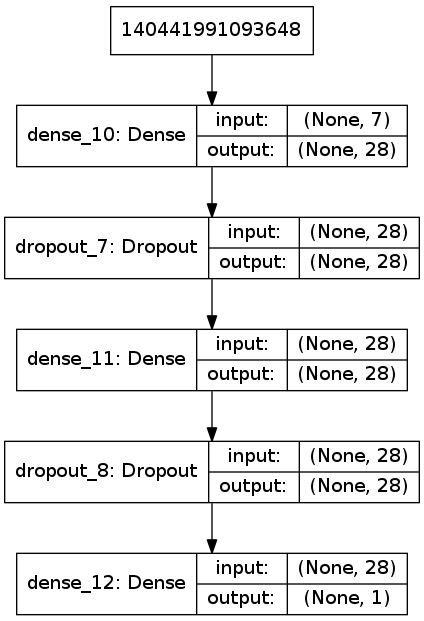

In [7]:
# Case 4: 2 layers, nodes = four* features  + l2 regularized

# Number of parameters: each neuron has one bias parameter and one weight per input 
# N = n_neurons * ( n_inputs + 1) 
# layer 1 : 28 * (7+1) = 224
# layer 2 : 28 * (28+1) = 812
# output : 1 * (28+1) = 29

model_2l_4f_l2reg = Sequential()

model_2l_4f_l2reg.add(Dense(NDIM*4, activation = "relu", input_shape=(NDIM, ), kernel_regularizer= regularizers.l2(0.01)))
model_2l_4f_l2reg.add(Dropout(0.2, noise_shape=None, seed=None))
model_2l_4f_l2reg.add(Dense(NDIM*4, activation = "relu", kernel_regularizer= regularizers.l2(0.01)))
model_2l_4f_l2reg.add(Dropout(0.2, noise_shape=None, seed=None)) 
model_2l_4f_l2reg.add(Dense(1, activation = "sigmoid"))


# compile the model
model_2l_4f_l2reg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_2l_4f_l2reg.summary()
plot_model(model_2l_4f_l2reg, to_file='model_2l_4f_l2reg_plot.png',
           show_shapes=True, show_layer_names=True)
Image(retina=True, filename='model_2l_4f_l2reg_plot.png')

In [8]:
#sample n (n=number of signal events) from bkg 
from sklearn.model_selection import train_test_split

df_sampled_bkg = df[('bkg','mm')].sample(n=df[('sig','mm')].shape[0], random_state=1)
df_all = pd.DataFrame([])
df_all = pd.concat([df[('sig','mm')],df_sampled_bkg])
print df[('sig','mm')].shape
print df_sampled_bkg.shape
print df_all.shape

df_all.sample(frac=1)
np.random.seed(4)
np.random.shuffle(df_all.values)


(951, 8)
(951, 8)
(1902, 8)


In [9]:
X = df_all.iloc[:,0:len(VARS)] #Predictors
Y = df_all.iloc[:,len(VARS)]   #Outcomes


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=7)
print type(X_test)
print type(X)
print(X_train.shape)
print(X_test.shape)
print(X_train.shape[0]/float(X_train.shape[0]+X_test.shape[0]))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(1521, 7)
(381, 7)
0.799684542587


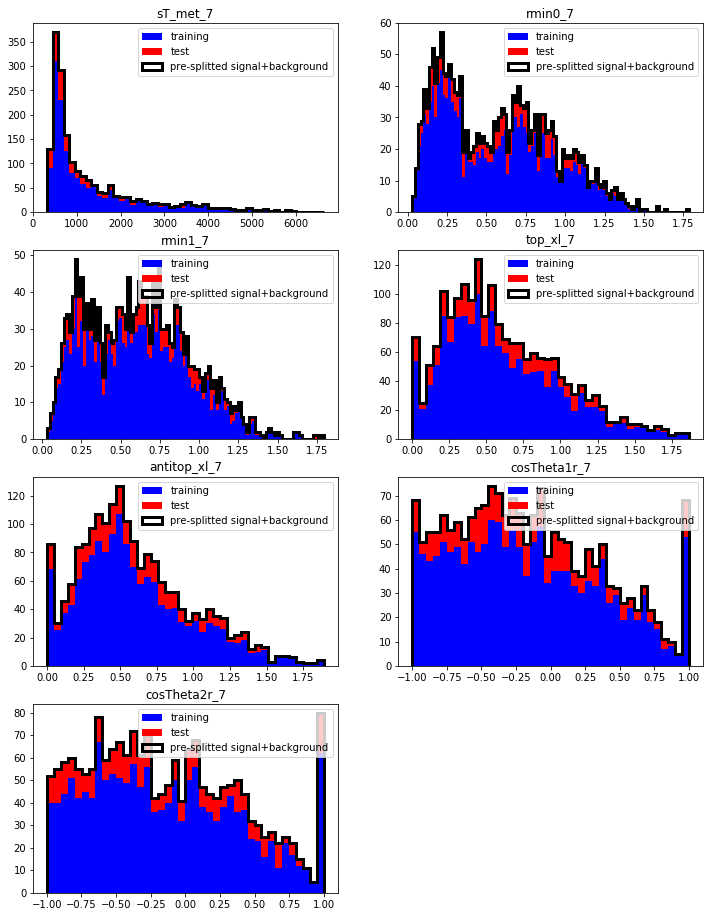

In [10]:
#print X_test.mean(axis=0) 
#print X_train.mean(axis=0) 
#print X.mean(axis=0) 
sample = {'training': 'blue', 'test': 'red'}

fig, ax = plt.subplots(int(math.ceil(len(VARS)/2.0)), 2, figsize=(12,16))
if len(VARS)%2 == 1 :  
    fig.delaxes(ax[int(math.ceil(len(VARS)/2.0))-1,1])

for i in range(len(VARS)):
    ax = plt.subplot(int(math.ceil(len(VARS)/2.0)), 2, i+1)    
    bins=np.histogram(np.hstack((X_test[VARS[i]],X_train[VARS[i]])), 
                      bins = BINS[VARS[i]])[1]
    plt.hist([X_train[VARS[i]], X_test[VARS[i]]], bins, stacked=True,
    color = [sample['training'], sample['test']], label=['training', 'test'])
    plt.hist(X[VARS[i]], bins, histtype='step',edgecolor='black', linewidth=3,
             facecolor='none',label='pre-splitted signal+background')
    ax.legend(loc="upper right")
    plt.title(VARS[i])

plt.show()  

('scaling operator mean', array([ 1.34955291e+03,  5.73492352e-01,  6.11085776e-01,  6.04775244e-01,
        5.97407104e-01, -1.69126488e-01, -1.45735232e-01]))
[ 6.54016982e-17  1.98540870e-17  8.05842353e-17 -1.44818046e-16
 -1.86861995e-17 -1.98540870e-17 -2.33577494e-18]
[-2.31928529e-02 -3.12688569e-05 -4.03097928e-02  4.36505011e-02
  3.55373196e-02  3.52526397e-02  2.14395854e-02]
[-4.64588695e-03 -6.26363537e-06 -8.07467458e-03  8.74387010e-03
  7.11867443e-03  7.06164865e-03  4.29468036e-03]
(1521, 7)


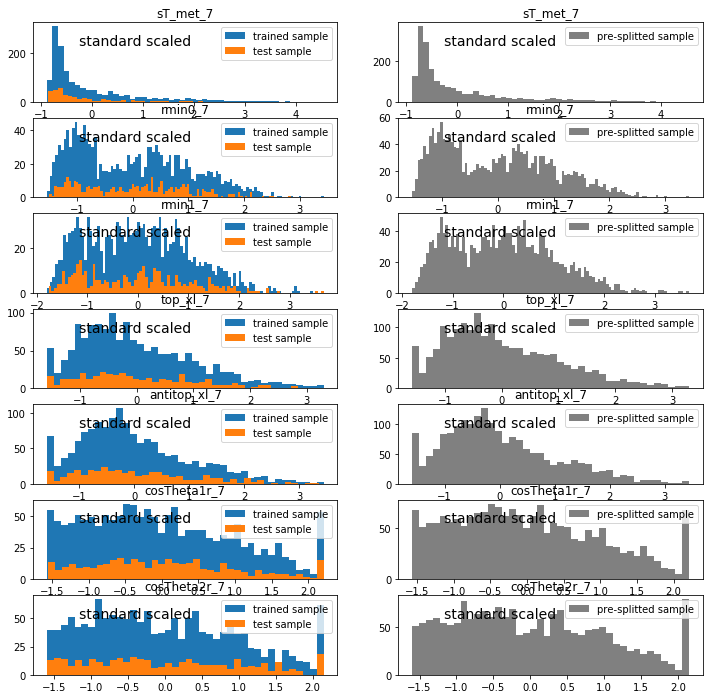

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.externals.joblib import dump, load
from sklearn.externals import joblib

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
print("scaling operator mean" , scaler.mean_)

scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename) 

scaler_total = joblib.load(scaler_filename) 
X = scaler_total.transform(X)

print X_train.mean(axis=0) 
print X_test.mean(axis=0) 
print X.mean(axis=0) 

print X_train.shape

fig, ax = plt.subplots(int(len(VARS)), 2, figsize=(12,12))


for i in range(len(VARS)):
    ax = plt.subplot(int(len(VARS)), 2, 2*(i%len(VARS))+1)
    plt.hist(X_train[:,i], bins=BINS[VARS[i]], label='trained sample')
    plt.hist(X_test[:,i], bins=BINS[VARS[i]],label='test sample')
    plt.title(VARS[i])
    ax.text(0.15, 0.85, 'standard scaled', transform=ax.transAxes, fontsize=14,
            verticalalignment='top')
    ax.legend(loc="upper right")

    ax = plt.subplot(int(len(VARS)), 2, 2*(i%len(VARS))+2)
    plt.hist(X[:,i], bins=BINS[VARS[i]],color='grey',label='pre-splitted sample')
    ax.legend(loc="upper right")
    plt.title(VARS[i])
    ax.text(0.15, 0.85, 'standard scaled', transform=ax.transAxes, fontsize=14,
            verticalalignment='top')
plt.show()  


In [12]:

# early stopping callback
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

# model checkpoint callback
# this saves our model architecture + parameters into dense_model.h5
from keras.callbacks import ModelCheckpoint
model_checkpoint = ModelCheckpoint('dense_model.h5', monitor='val_loss', 
                                   verbose=0, save_best_only=True, 
                                   save_weights_only=False, mode='auto', 
                                   period=1)
# Train classifier
history_2l_2f = model_2l_2f.fit(X_train, 
                                Y_train, 
                                epochs=400, 
                                batch_size=1024, 
                                verbose=0, # switch to 1 for more verbosity 
                                callbacks=[early_stopping, model_checkpoint], 
                                validation_split=0.25)

# Train classifier
history_2l_3f = model_2l_3f.fit(X_train, 
                                Y_train, 
                                epochs=400, 
                                batch_size=1024, 
                                verbose=0, # switch to 1 for more verbosity 
                                callbacks=[early_stopping, model_checkpoint], 
                                validation_split=0.25)


# Train classifier
history_2l_4f = model_2l_4f.fit(X_train, 
                                Y_train, 
                                epochs=400, 
                                batch_size=1024, 
                                verbose=0, # switch to 1 for more verbosity 
                                callbacks=[early_stopping, model_checkpoint], 
                                validation_split=0.25)


# Train classifier
history_2l_4f_l2reg = model_2l_4f_l2reg.fit(X_train, 
                                            Y_train, 
                                            epochs=400, 
                                            batch_size=1024, 
                                            verbose=0, # switch to 1 for more verbosity 
                                            callbacks=[early_stopping, model_checkpoint], 
                                            validation_split=0.25)

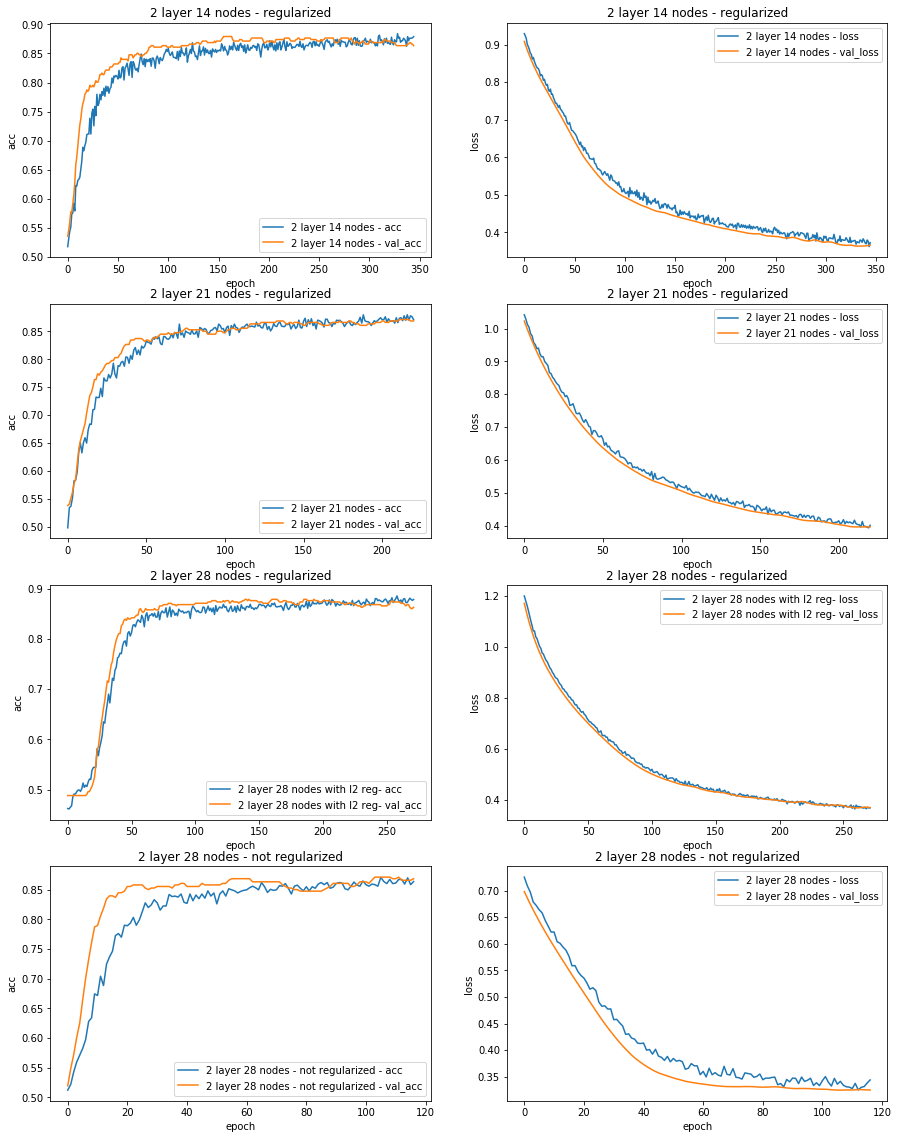

In [13]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize=(15,25))

#MODEL 1
# plot accuracy vs epoch
ax = plt.subplot(5, 2, 1)
ax.plot(history_2l_2f.history['acc'], label='2 layer 14 nodes - acc')
ax.plot(history_2l_2f.history['val_acc'], label='2 layer 14 nodes - val_acc')
ax.legend(loc="lower right")
ax.set_xlabel('epoch')
ax.set_ylabel('acc')
ax.set_title('2 layer 14 nodes - regularized'); 

# plot loss vs epoch
ax = plt.subplot(5, 2, 2)
ax.plot(history_2l_2f.history['loss'], label='2 layer 14 nodes - loss')
ax.plot(history_2l_2f.history['val_loss'], label='2 layer 14 nodes - val_loss')
ax.legend(loc="upper right")
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_title('2 layer 14 nodes - regularized'); 


#MODEL 2
# plot accuracy vs epoch
ax = plt.subplot(5, 2, 3)
ax.plot(history_2l_3f.history['acc'], label='2 layer 21 nodes - acc')
ax.plot(history_2l_3f.history['val_acc'], label='2 layer 21 nodes - val_acc')
ax.legend(loc="lower right")
ax.set_xlabel('epoch')
ax.set_ylabel('acc')
ax.set_title('2 layer 21 nodes - regularized'); 


# plot loss vs epoch
ax = plt.subplot(5, 2, 4)
ax.plot(history_2l_3f.history['loss'], label='2 layer 21 nodes - loss')
ax.plot(history_2l_3f.history['val_loss'], label='2 layer 21 nodes - val_loss')
ax.legend(loc="upper right")
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_title('2 layer 21 nodes - regularized'); 


#MODEL 4
# plot accuracy vs epoch
ax = plt.subplot(5, 2, 5)
ax.plot(history_2l_4f_l2reg.history['acc'], label='2 layer 28 nodes with l2 reg- acc')
ax.plot(history_2l_4f_l2reg.history['val_acc'], label='2 layer 28 nodes with l2 reg- val_acc')
ax.legend(loc="lower right")
ax.set_xlabel('epoch')
ax.set_ylabel('acc')
ax.set_title('2 layer 28 nodes - regularized'); 

# plot loss vs epoch
ax = plt.subplot(5, 2, 6)
ax.plot(history_2l_4f_l2reg.history['loss'], label='2 layer 28 nodes with l2 reg- loss')
ax.plot(history_2l_4f_l2reg.history['val_loss'], label='2 layer 28 nodes with l2 reg- val_loss')
ax.legend(loc="upper right")
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_title('2 layer 28 nodes - regularized'); 


#MODEL 3
# plot accuracy vs epoch
ax = plt.subplot(5, 2, 7)
ax.plot(history_2l_4f.history['acc'], label='2 layer 28 nodes - not regularized - acc')
ax.plot(history_2l_4f.history['val_acc'], label='2 layer 28 nodes - not regularized - val_acc')
ax.legend(loc="lower right")
ax.set_xlabel('epoch')
ax.set_ylabel('acc')
ax.set_title('2 layer 28 nodes - not regularized'); 


# plot loss vs epoch
ax = plt.subplot(5, 2, 8)
ax.plot(history_2l_4f.history['loss'], label='2 layer 28 nodes - loss')
ax.plot(history_2l_4f.history['val_loss'], label='2 layer 28 nodes - val_loss')
ax.legend(loc="upper right")
ax.set_xlabel('epoch')
ax.set_ylabel('loss')
ax.set_title('2 layer 28 nodes - not regularized'); 


Text(0,0.5,'loss')

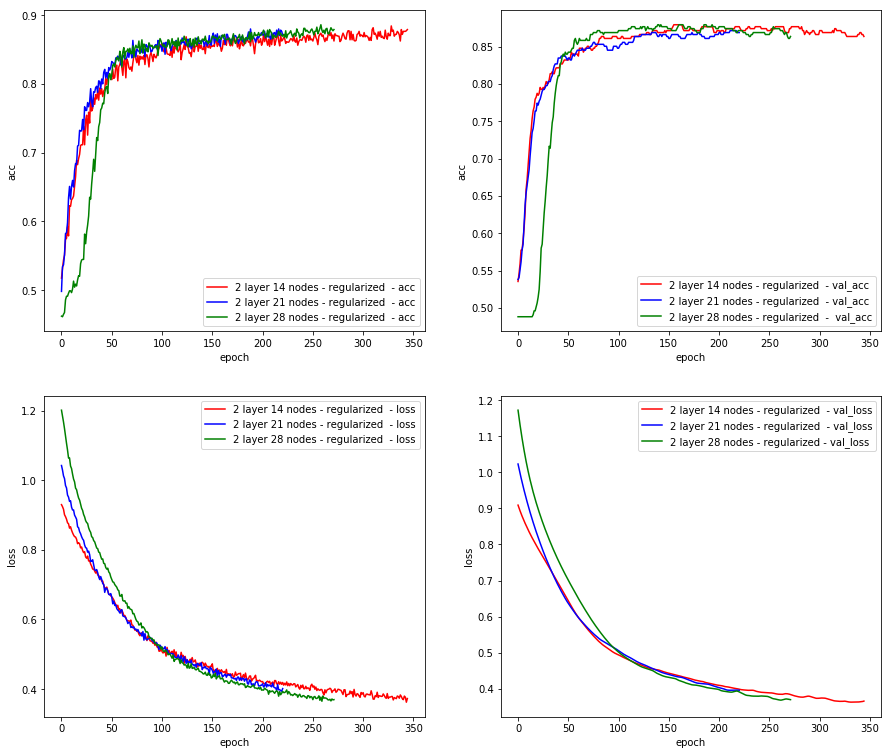

In [14]:
#COMPARING MODELS
plt.figure(figsize=(15,13))

# plot accuracy vs epoch
ax = plt.subplot(2, 2, 1)
ax.plot(history_2l_2f.history['acc'], color = 'red', label='2 layer 14 nodes - regularized  - acc')
ax.plot(history_2l_3f.history['acc'], color = 'blue', label='2 layer 21 nodes - regularized  - acc')
ax.plot(history_2l_4f_l2reg.history['acc'], color = 'green', label='2 layer 28 nodes - regularized  - acc')

ax.legend(loc="lower right")
ax.set_xlabel('epoch')
ax.set_ylabel('acc')

ax = plt.subplot(2, 2, 2)
ax.plot(history_2l_2f.history['val_acc'], color = 'red', label='2 layer 14 nodes - regularized  - val_acc')
ax.plot(history_2l_3f.history['val_acc'], color = 'blue', label='2 layer 21 nodes - regularized  - val_acc')
ax.plot(history_2l_4f_l2reg.history['val_acc'], color = 'green', label='2 layer 28 nodes - regularized  -  val_acc')

ax.legend(loc="lower right")
ax.set_xlabel('epoch')
ax.set_ylabel('acc')

# plot loss vs epoch
ax = plt.subplot(2, 2, 3)
ax.plot(history_2l_2f.history['loss'], color = 'red', label='2 layer 14 nodes - regularized  - loss')
ax.plot(history_2l_3f.history['loss'], color = 'blue', label='2 layer 21 nodes - regularized  - loss')
ax.plot(history_2l_4f_l2reg.history['loss'], color = 'green', label='2 layer 28 nodes - regularized  - loss')

#ax.plot(history_2l_4f.history['val_loss'], label='2 layer 28 nodes - val_loss')
ax.legend(loc="upper right")
ax.set_xlabel('epoch')
ax.set_ylabel('loss')


# plot loss vs epoch
ax = plt.subplot(2, 2, 4)
ax.plot(history_2l_2f.history['val_loss'], color = 'red', label='2 layer 14 nodes - regularized  - val_loss')
ax.plot(history_2l_3f.history['val_loss'], color = 'blue', label='2 layer 21 nodes - regularized  - val_loss')
ax.plot(history_2l_4f_l2reg.history['val_loss'], color = 'green', label='2 layer 28 nodes - regularized - val_loss')

ax.legend(loc="upper right")
ax.set_xlabel('epoch')
ax.set_ylabel('loss')

Text(0,0.5,'loss')

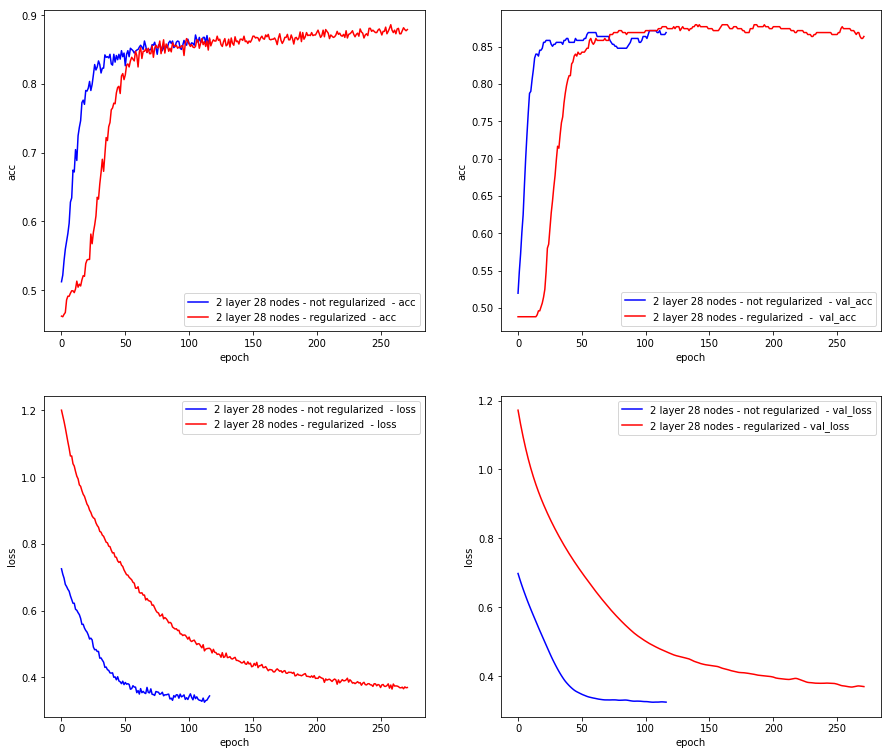

In [15]:
#COMPARING MODELS
plt.figure(figsize=(15,13))

# plot accuracy vs epoch
ax = plt.subplot(2, 2, 1)
ax.plot(history_2l_4f.history['acc'], color = 'blue', label='2 layer 28 nodes - not regularized  - acc')
ax.plot(history_2l_4f_l2reg.history['acc'], color = 'red', label='2 layer 28 nodes - regularized  - acc')

ax.legend(loc="lower right")
ax.set_xlabel('epoch')
ax.set_ylabel('acc')

ax = plt.subplot(2, 2, 2)
ax.plot(history_2l_4f.history['val_acc'], color = 'blue', label='2 layer 28 nodes - not regularized  - val_acc')
ax.plot(history_2l_4f_l2reg.history['val_acc'], color = 'red', label='2 layer 28 nodes - regularized  -  val_acc')

ax.legend(loc="lower right")
ax.set_xlabel('epoch')
ax.set_ylabel('acc')

# plot loss vs epoch
ax = plt.subplot(2, 2, 3)
ax.plot(history_2l_4f.history['loss'], color = 'blue', label='2 layer 28 nodes - not regularized  - loss')
ax.plot(history_2l_4f_l2reg.history['loss'], color = 'red', label='2 layer 28 nodes - regularized  - loss')

#ax.plot(history_2l_4f.history['val_loss'], label='2 layer 28 nodes - val_loss')
ax.legend(loc="upper right")
ax.set_xlabel('epoch')
ax.set_ylabel('loss')


# plot loss vs epoch
ax = plt.subplot(2, 2, 4)
ax.plot(history_2l_4f.history['val_loss'], color = 'blue', label='2 layer 28 nodes - not regularized  - val_loss')
ax.plot(history_2l_4f_l2reg.history['val_loss'], color = 'red', label='2 layer 28 nodes - regularized - val_loss')

ax.legend(loc="upper right")
ax.set_xlabel('epoch')
ax.set_ylabel('loss')

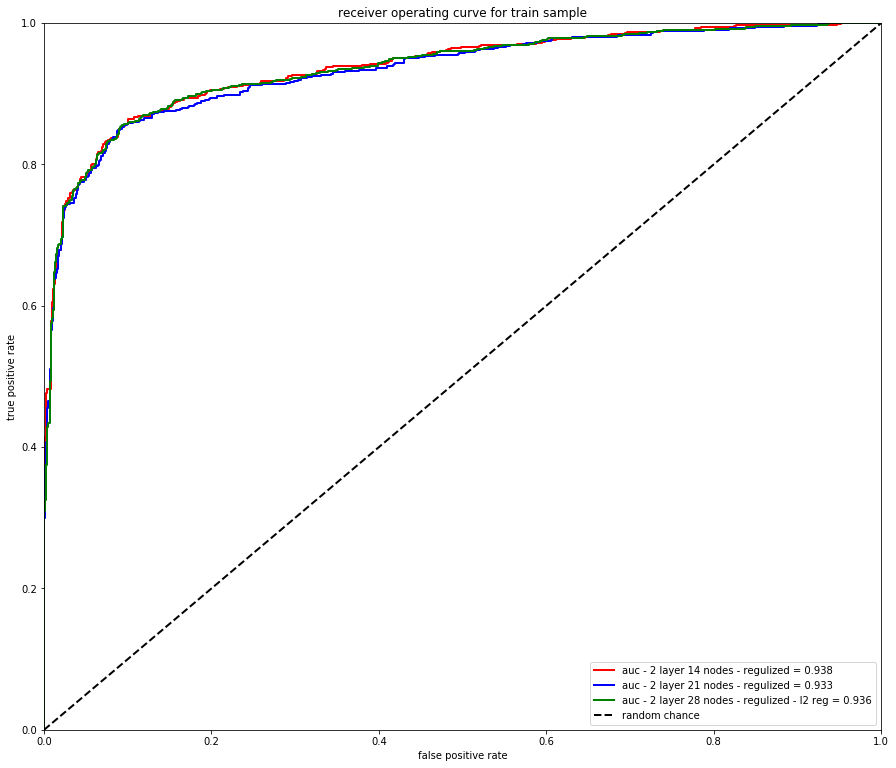

In [16]:
plt.figure(figsize=(15,13))

# Plot ROC for train sample
from sklearn.metrics import roc_curve, auc
Y_predict_2l_2f_train = model_2l_2f.predict(X_train)
Y_predict_2l_3f_train = model_2l_3f.predict(X_train)
Y_predict_2l_4f_train = model_2l_4f.predict(X_train)
Y_predict_2l_4f_l2reg_train = model_2l_4f_l2reg.predict(X_train)


fpr_2l_2f_train , tpr_2l_2f_train , thresholds_2l_2f_train  = roc_curve(Y_train, Y_predict_2l_2f_train )

fpr_2l_3f_train , tpr_2l_3f_train , thresholds_2l_3f_train  = roc_curve(Y_train, Y_predict_2l_3f_train )

fpr_2l_4f_train , tpr_2l_4f_train , thresholds_2l_4f_train  = roc_curve(Y_train, Y_predict_2l_4f_train )

fpr_2l_4f_l2reg_train , tpr_2l_4f_l2reg_train , thresholds_2l_4f_l2reg_train  = roc_curve(Y_train, Y_predict_2l_4f_l2reg_train )

roc_auc_2l_2f_train  = auc(fpr_2l_2f_train , tpr_2l_2f_train )
roc_auc_2l_3f_train  = auc(fpr_2l_3f_train , tpr_2l_3f_train )
roc_auc_2l_4f_train  = auc(fpr_2l_4f_train , tpr_2l_4f_train )
roc_auc_2l_4f_l2reg_train  = auc(fpr_2l_4f_l2reg_train , tpr_2l_4f_l2reg_train )


ax = plt.subplot(1, 1, 1)
ax.plot(fpr_2l_2f_train , tpr_2l_2f_train , lw=2, color='red', label='auc - 2 layer 14 nodes - regulized = %.3f' 
        % (roc_auc_2l_2f_train ))
ax.plot(fpr_2l_3f_train , tpr_2l_3f_train , lw=2, color='blue', label='auc - 2 layer 21 nodes - regulized = %.3f' 
        % (roc_auc_2l_3f_train ))
#ax.plot(fpr_2l_4f_train , tpr_2l_4f_train , lw=2, color='green', label='auc - 2 layer 28 nodes = %.3f' 
#        % (roc_auc_2l_4f_train ))
ax.plot(fpr_2l_4f_l2reg_train , tpr_2l_4f_l2reg_train , lw=2, color='green', label='auc - 2 layer 28 nodes - regulized - l2 reg = %.3f' 
        % (roc_auc_2l_4f_l2reg_train ))

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
ax.set_xlim([0, 1.0])
ax.set_ylim([0, 1.0])
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
ax.set_title('receiver operating curve for train sample')
ax.legend(loc="lower right")



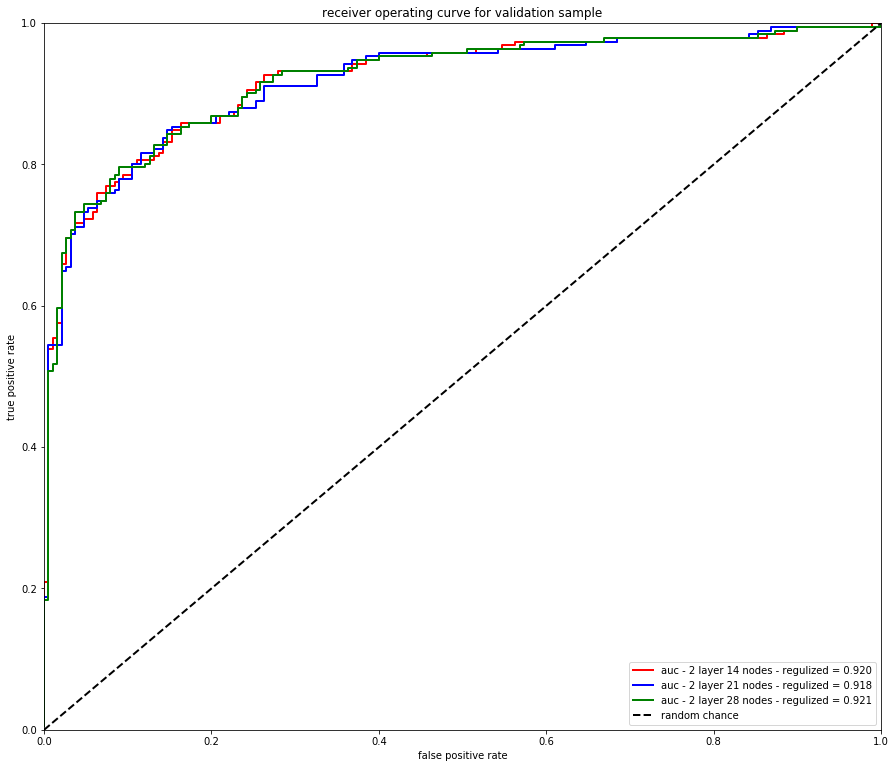

In [17]:
plt.figure(figsize=(15,13))

# Plot ROC for validation sample
from sklearn.metrics import roc_curve, auc
Y_predict_2l_2f_test = model_2l_2f.predict(X_test)
Y_predict_2l_3f_test = model_2l_3f.predict(X_test)
Y_predict_2l_4f_test = model_2l_4f.predict(X_test)
Y_predict_2l_4f_l2reg_test = model_2l_4f_l2reg.predict(X_test)

fpr_2l_2f_test , tpr_2l_2f_test , thresholds_2l_2f_test  = roc_curve(Y_test, Y_predict_2l_2f_test )

fpr_2l_3f_test , tpr_2l_3f_test , thresholds_2l_3f_test  = roc_curve(Y_test, Y_predict_2l_3f_test )

fpr_2l_4f_test , tpr_2l_4f_test , thresholds_2l_4f_test  = roc_curve(Y_test, Y_predict_2l_4f_test )

fpr_2l_4f_l2reg_test , tpr_2l_4f_l2reg_test , thresholds_2l_4f_l2reg_test  = roc_curve(Y_test, Y_predict_2l_4f_l2reg_test )


roc_auc_2l_2f_test  = auc(fpr_2l_2f_test , tpr_2l_2f_test )
roc_auc_2l_3f_test  = auc(fpr_2l_3f_test , tpr_2l_3f_test )
roc_auc_2l_4f_l2reg_test  = auc(fpr_2l_4f_l2reg_test , tpr_2l_4f_l2reg_test )


ax = plt.subplot(1, 1, 1)
ax.plot(fpr_2l_2f_test , tpr_2l_2f_test , lw=2, color='red', label='auc - 2 layer 14 nodes - regulized = %.3f' 
        % (roc_auc_2l_2f_test ))
ax.plot(fpr_2l_3f_test , tpr_2l_3f_test , lw=2, color='blue', label='auc - 2 layer 21 nodes - regulized = %.3f' 
        % (roc_auc_2l_3f_test ))
ax.plot(fpr_2l_4f_l2reg_test , tpr_2l_4f_l2reg_test , lw=2, color='green', label='auc - 2 layer 28 nodes - regulized = %.3f' 
        % (roc_auc_2l_4f_l2reg_test ))

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
ax.set_xlim([0, 1.0])
ax.set_ylim([0, 1.0])
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
ax.set_title('receiver operating curve for validation sample')
ax.legend(loc="lower right")



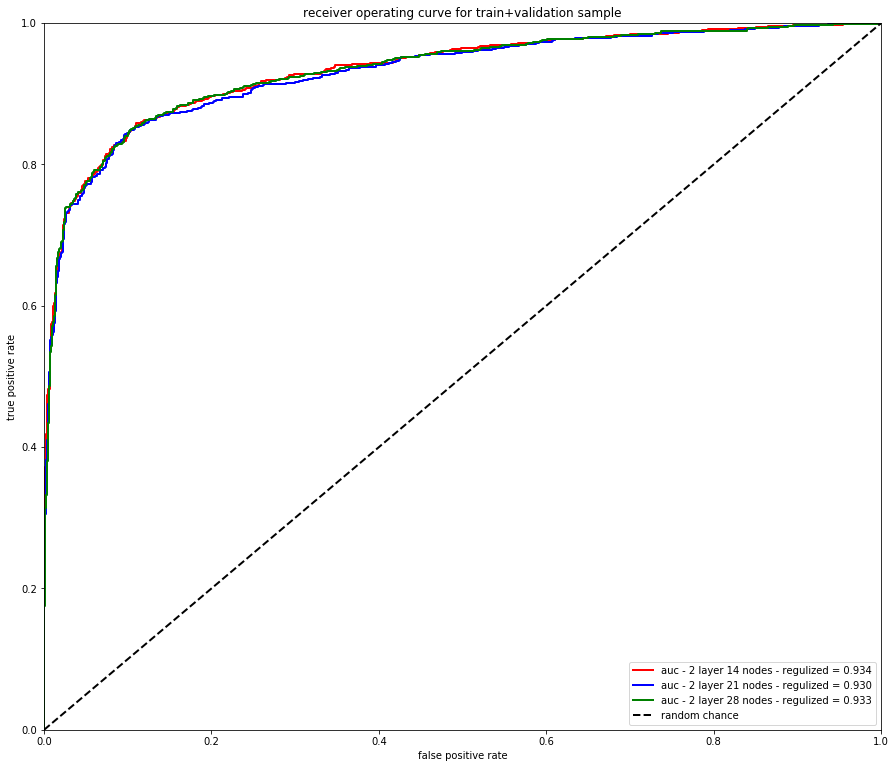

In [18]:
plt.figure(figsize=(15,13))

# Plot ROC for entire sample
from sklearn.metrics import roc_curve, auc
Y_predict_2l_2f = model_2l_2f.predict(X)
Y_predict_2l_3f = model_2l_3f.predict(X)
Y_predict_2l_4f = model_2l_4f.predict(X)
Y_predict_2l_4f_l2reg = model_2l_4f_l2reg.predict(X)

fpr_2l_2f , tpr_2l_2f , thresholds_2l_2f  = roc_curve(Y, Y_predict_2l_2f )

fpr_2l_3f , tpr_2l_3f , thresholds_2l_3f  = roc_curve(Y, Y_predict_2l_3f )

fpr_2l_4f , tpr_2l_4f , thresholds_2l_4f  = roc_curve(Y, Y_predict_2l_4f )

fpr_2l_4f_l2reg , tpr_2l_4f_l2reg , thresholds_2l_4f_l2reg  = roc_curve(Y, Y_predict_2l_4f_l2reg )


roc_auc_2l_2f  = auc(fpr_2l_2f , tpr_2l_2f )
roc_auc_2l_3f  = auc(fpr_2l_3f , tpr_2l_3f )
roc_auc_2l_4f  = auc(fpr_2l_4f , tpr_2l_4f )
roc_auc_2l_4f_l2reg  = auc(fpr_2l_4f_l2reg , tpr_2l_4f_l2reg )


ax = plt.subplot(1, 1, 1)
ax.plot(fpr_2l_2f , tpr_2l_2f , lw=2, color='red', label='auc - 2 layer 14 nodes - regulized = %.3f' 
        % (roc_auc_2l_2f ))
ax.plot(fpr_2l_3f , tpr_2l_3f , lw=2, color='blue', label='auc - 2 layer 21 nodes - regulized = %.3f' 
        % (roc_auc_2l_3f ))
ax.plot(fpr_2l_4f_l2reg , tpr_2l_4f_l2reg , lw=2, color='green', label='auc - 2 layer 28 nodes - regulized = %.3f' 
        % (roc_auc_2l_4f_l2reg ))

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
ax.set_xlim([0, 1.0])
ax.set_ylim([0, 1.0])
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
ax.set_title('receiver operating curve for train+validation sample')
ax.legend(loc="lower right")



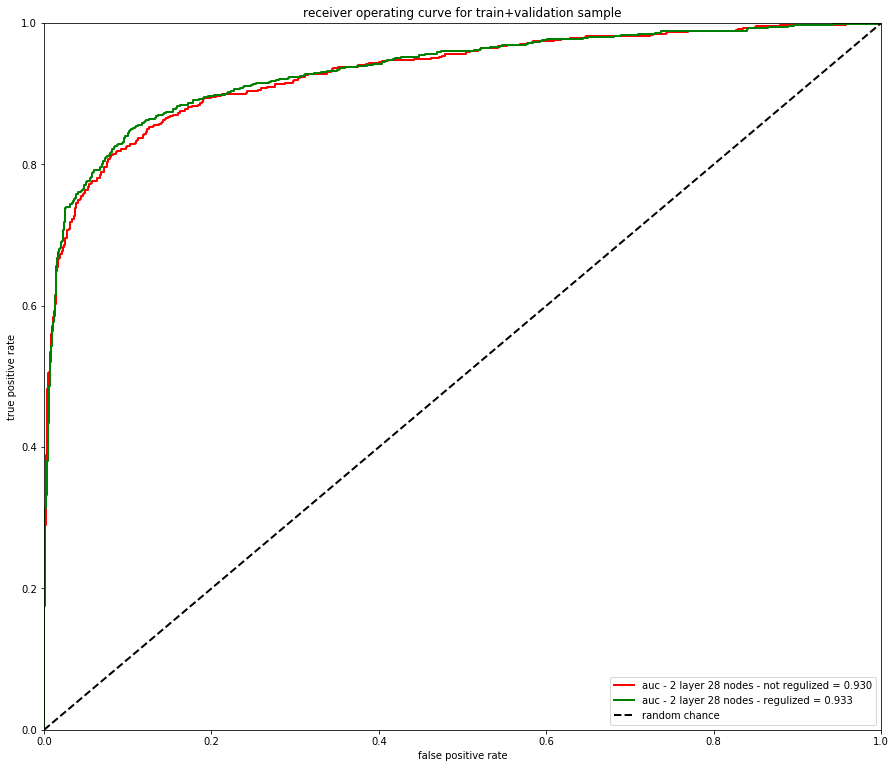

In [19]:
plt.figure(figsize=(15,13))

# Plot ROC for entire sample

ax = plt.subplot(1, 1, 1)

ax.plot(fpr_2l_4f , tpr_2l_4f , lw=2, color='red', label='auc - 2 layer 28 nodes - not regulized = %.3f' 
        % (roc_auc_2l_4f ))
ax.plot(fpr_2l_4f_l2reg , tpr_2l_4f_l2reg , lw=2, color='green', label='auc - 2 layer 28 nodes - regulized = %.3f' 
        % (roc_auc_2l_4f_l2reg ))

ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
ax.set_xlim([0, 1.0])
ax.set_ylim([0, 1.0])
ax.set_xlabel('false positive rate')
ax.set_ylabel('true positive rate')
ax.set_title('receiver operating curve for train+validation sample')
ax.legend(loc="lower right")



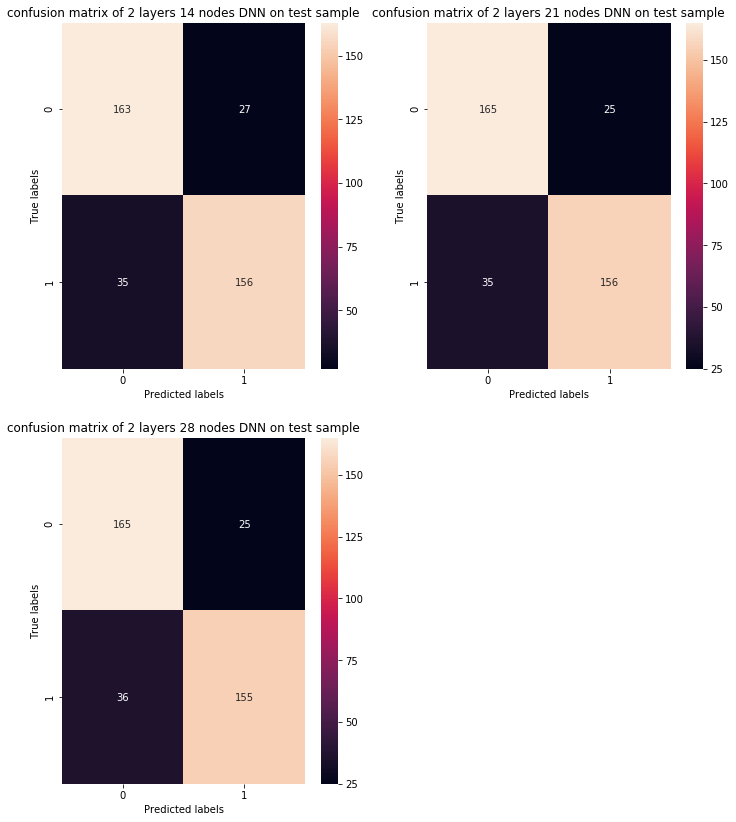

[[163  27]
 [ 35 156]]
[[165  25]
 [ 35 156]]
[[165  25]
 [ 36 155]]


'\n# Example of a confusion matrix in Python\nfrom sklearn.metrics import confusion_matrix\n \nexpected = [1, 1, 0, 1, 0, 0, 1, 0, 0, 0]\npredicted = [1, 0, 0, 1, 0, 0, 1, 1, 1, 0]\nresults = confusion_matrix(expected, predicted)\nprint(results)\n\n[[4 2]\n[1 3]]\n'

In [20]:

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(2, 2, figsize=(12,14))
fig.delaxes(ax[1,1])
    
matrix_2l_2f_test = confusion_matrix(Y_test, Y_predict_2l_2f_test.round())
matrix_2l_3f_test = confusion_matrix(Y_test, Y_predict_2l_3f_test.round())
matrix_2l_4f_l2reg_test = confusion_matrix(Y_test, Y_predict_2l_4f_l2reg_test.round())



ax = plt.subplot(2, 2, 1)
sns.heatmap(matrix_2l_2f_test, annot=True, ax = ax, fmt='g'); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('confusion matrix of 2 layers 14 nodes DNN on test sample'); 



ax = plt.subplot(2, 2, 2)
sns.heatmap(matrix_2l_3f_test, annot=True, ax = ax, fmt='g'); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('confusion matrix of 2 layers 21 nodes DNN on test sample'); 


ax = plt.subplot(2, 2, 3)
sns.heatmap(matrix_2l_4f_l2reg_test, annot=True, ax = ax, fmt='g'); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('confusion matrix of 2 layers 28 nodes DNN on test sample'); 
plt.show()
print matrix_2l_2f_test
print matrix_2l_3f_test
print matrix_2l_4f_l2reg_test
'''
# Example of a confusion matrix in Python
from sklearn.metrics import confusion_matrix
 
expected = [1, 1, 0, 1, 0, 0, 1, 0, 0, 0]
predicted = [1, 0, 0, 1, 0, 0, 1, 1, 1, 0]
results = confusion_matrix(expected, predicted)
print(results)

[[4 2]
[1 3]]
'''

# evaluate the model
#model.evaluate(X_test, Y_test, verbose=0)

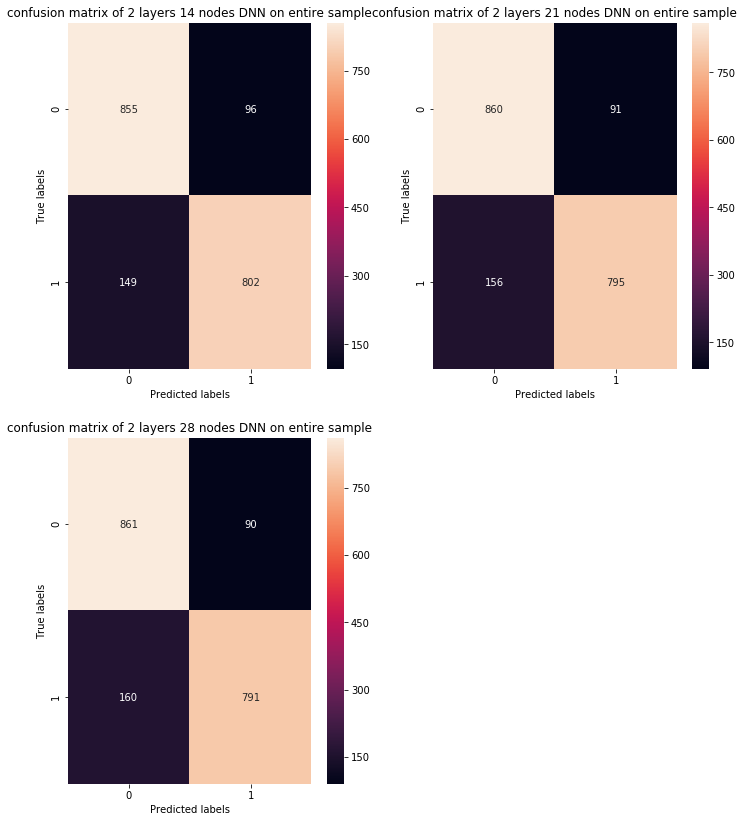

In [21]:
df_all['model_2l_2f_predicted'] = model_2l_2f.predict(X) # add prediction to array
df_all['model_2l_3f_predicted'] = model_2l_3f.predict(X) # add prediction to array
df_all['model_2l_4f_predicted'] = model_2l_4f_l2reg.predict(X) # add prediction to array


all_matrix_2l_2f = confusion_matrix(df_all['label'], df_all['model_2l_2f_predicted'].round())
all_matrix_2l_3f = confusion_matrix(df_all['label'], df_all['model_2l_3f_predicted'].round())
all_matrix_2l_4f = confusion_matrix(df_all['label'], df_all['model_2l_4f_predicted'].round())

fig, ax = plt.subplots(2, 2, figsize=(12,14))
fig.delaxes(ax[1,1])

ax = plt.subplot(2, 2, 1)
sns.heatmap(all_matrix_2l_2f, annot=True, ax = ax, fmt='g'); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('confusion matrix of 2 layers 14 nodes DNN on entire sample');

ax = plt.subplot(2, 2, 2)
sns.heatmap(all_matrix_2l_3f, annot=True, ax = ax, fmt='g'); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('confusion matrix of 2 layers 21 nodes DNN on entire sample');

ax = plt.subplot(2, 2, 3)
sns.heatmap(all_matrix_2l_4f, annot=True, ax = ax, fmt='g'); 
# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('confusion matrix of 2 layers 28 nodes DNN on entire sample');

In [22]:
from matplotlib import cm

print df_all.iloc[:5]


      sT_met_7   rmin0_7   rmin1_7  top_xl_7  antitop_xl_7  cosTheta1r_7  \
0  1664.990030  0.293573  0.540682  0.230341      0.604891      0.337356   
1  3870.907223  0.334053  0.296923  0.128683      0.123010      0.686795   
2  1509.356125  0.242392  0.265207  0.501392      0.728587     -0.834128   
3   566.331198  0.689938  0.652634  0.224334      1.082757     -0.970823   
4   699.818708  0.601258  0.193716  0.553263      1.072413     -0.255296   

   cosTheta2r_7  label  model_2l_2f_predicted  model_2l_3f_predicted  \
0     -0.079129    1.0               0.928230               0.931425   
1      0.359347    1.0               0.991507               0.996861   
2     -0.946214    1.0               0.956950               0.934396   
3     -0.674735    0.0               0.099935               0.143834   
4     -0.427950    0.0               0.782333               0.728155   

   model_2l_4f_predicted  
0               0.933412  
1               0.997741  
2               0.952579  
3 

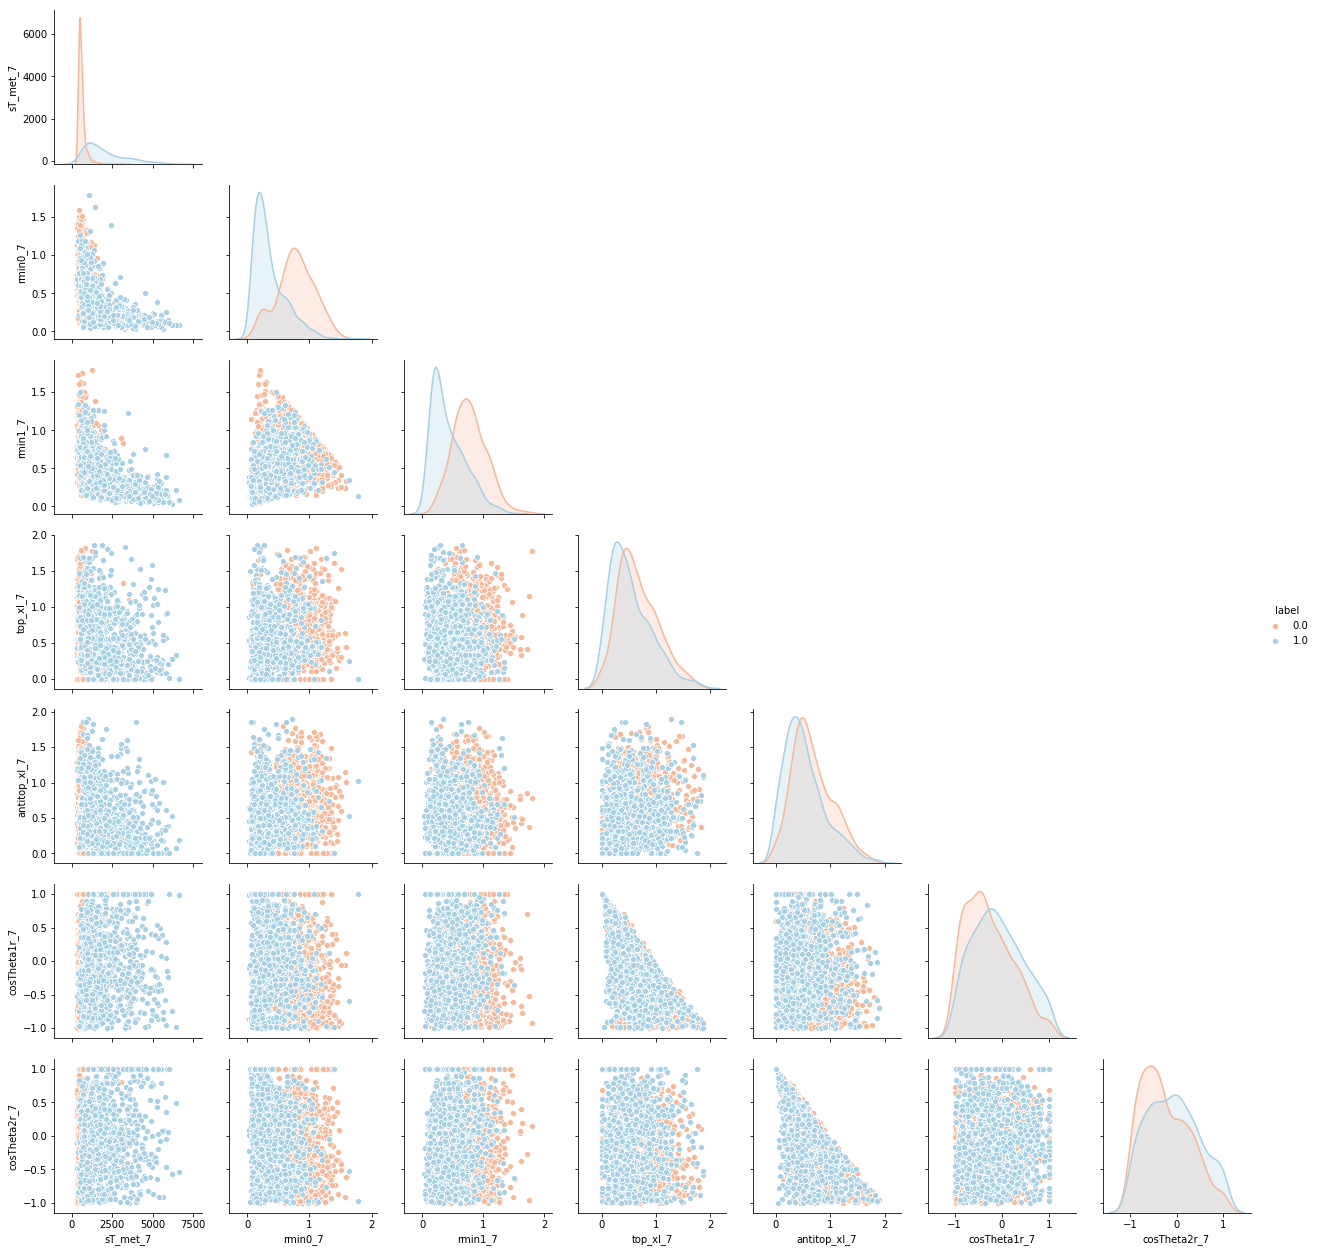

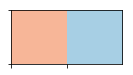

In [23]:
def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)
#sns.color_palette("hls", 8)
palette = sns.color_palette("RdBu",n_colors=2)
sns.set_palette(palette)
g = sns.pairplot(df_all, x_vars=VARS, y_vars=VARS, hue="label")
sns.palplot(palette)
g.map_upper(hide_current_axis)


/usr/local/bin/start_ipykernel.py:7: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead


Text(0.5,0.98,'2 hidden layers 14 nodes')

<Figure size 1440x1440 with 0 Axes>

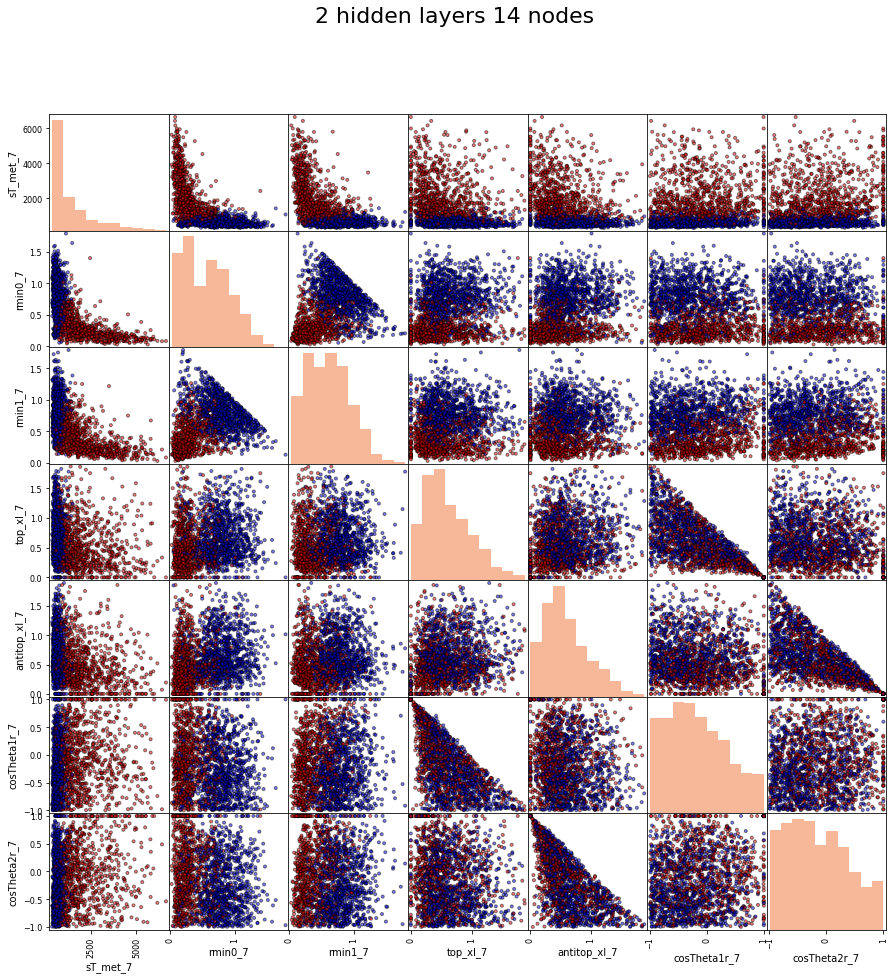

In [24]:
from pandas.plotting import scatter_matrix
from matplotlib.colors import ListedColormap
plt.figure(figsize=(20,20))
cm = plt.cm.bwr
cm_bright = ListedColormap(['#0000FF','#FF0000'])
pd.scatter_matrix(df_all[VARS],c=df_all['model_2l_2f_predicted'], cmap=cm_bright
                  , edgecolors='k', figsize  = [15, 15])
plt.suptitle('2 hidden layers 14 nodes',fontsize=22)



/usr/local/bin/start_ipykernel.py:7: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead


Text(0.5,0.98,'2 hidden layers 21 nodes')

<Figure size 1440x1440 with 0 Axes>

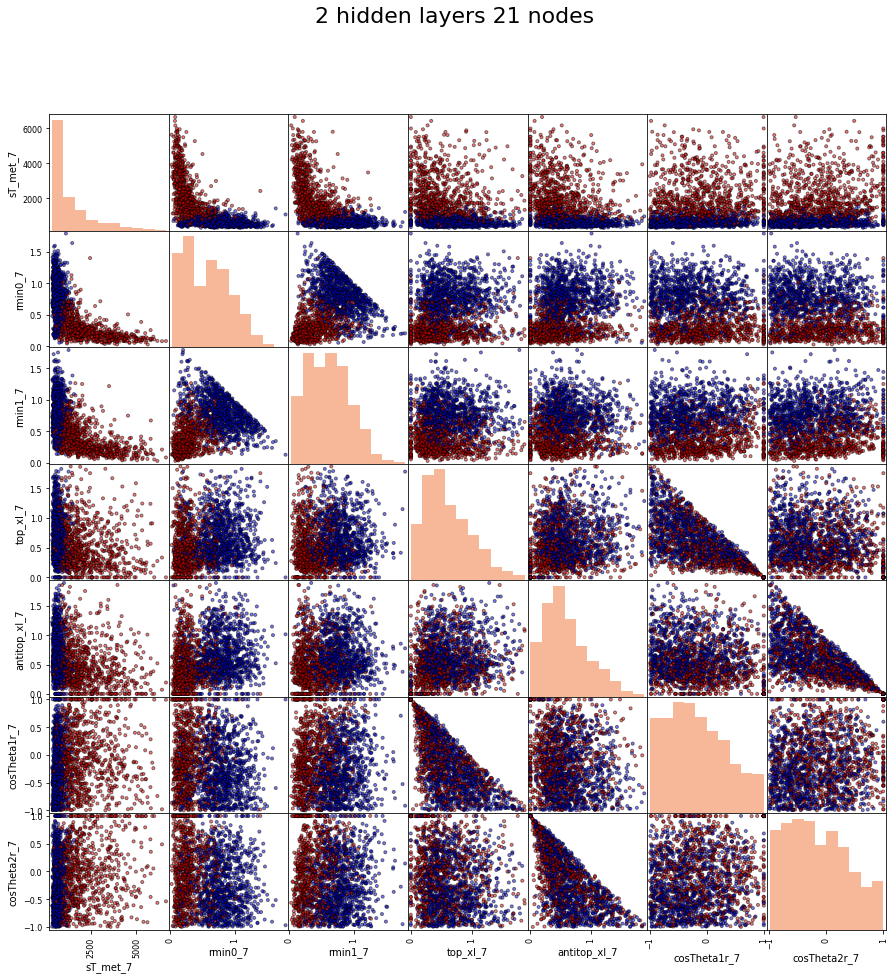

In [25]:
from pandas.plotting import scatter_matrix
from matplotlib.colors import ListedColormap
plt.figure(figsize=(20,20))
cm = plt.cm.bwr
cm_bright = ListedColormap(['#0000FF','#FF0000'])
pd.scatter_matrix(df_all[VARS],c=df_all['model_2l_3f_predicted'], cmap=cm_bright
                  , edgecolors='k', figsize  = [15, 15])
plt.suptitle('2 hidden layers 21 nodes',fontsize=22)

/usr/local/bin/start_ipykernel.py:7: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead


Text(0.5,0.98,'2 hidden layers 28 nodes')

<Figure size 1440x1440 with 0 Axes>

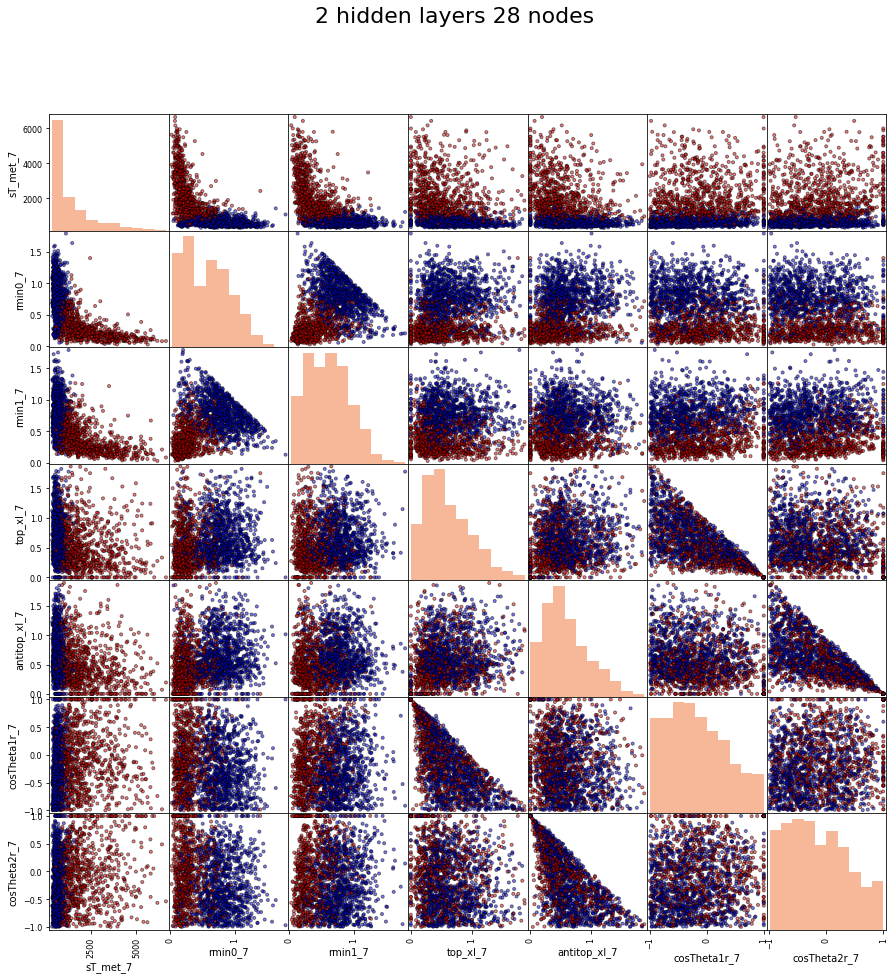

In [26]:
from pandas.plotting import scatter_matrix
from matplotlib.colors import ListedColormap
plt.figure(figsize=(20,20))
cm = plt.cm.bwr
cm_bright = ListedColormap(['#0000FF','#FF0000'])
pd.scatter_matrix(df_all[VARS],c=df_all['model_2l_4f_predicted'], cmap=cm_bright
                  , edgecolors='k', figsize  = [15, 15])
plt.suptitle('2 hidden layers 28 nodes',fontsize=22)

In [27]:

def histogram_intersection(h1, h2):
    n1 = h1[0]
    n2 = h2[0]
    bins1 = h1[1]
    bins2 = h2[1]
    min_diff = 100
    intersect = 0    
    for i in range(1,len(n1)) :
        diff = abs(n1[i] - n2[i]);
        #print i, diff, min_diff, intersect
        if (diff < min_diff):
            min_diff = diff
            intersect = bins1[i-1] 

    return intersect   

intersection of bkg and sig predicted value 0.47368421052631576
intersection of bkg and sig predicted value 0.42105263157894735


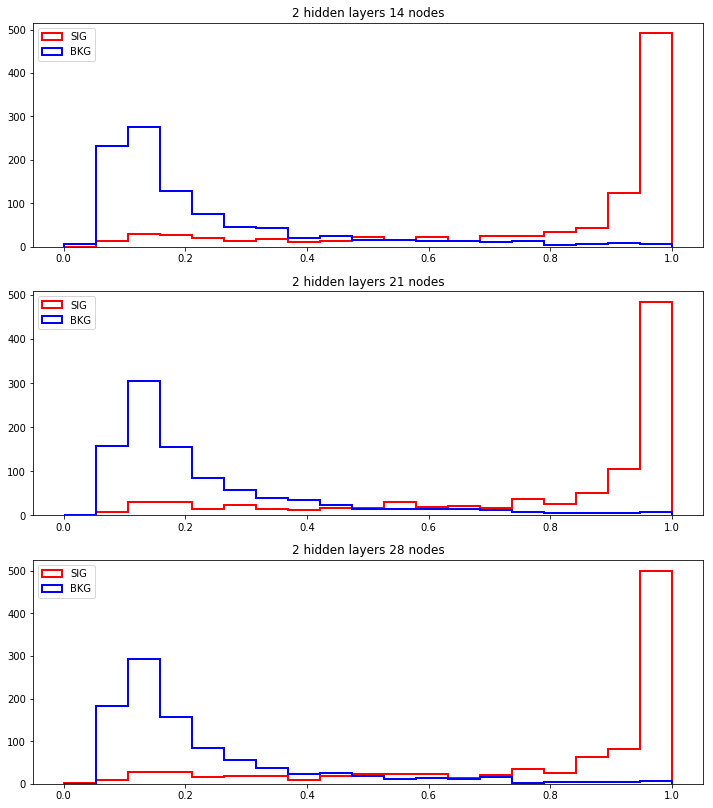

intersection of bkg and sig predicted value 0.5789473684210527


In [28]:
fig, ax = plt.subplots(3, 1, figsize=(12,14))
ax = plt.subplot(3, 1, 1)
binBoundaries = np.linspace(0,1.0,20)
h1_sig = plt.hist(df_all[df_all['label'] == 1]["model_2l_2f_predicted"], 
                  bins = np.linspace(0,1.0,20), label='SIG',histtype='step',lw=2, color='red')
h1_bkg = plt.hist(df_all[df_all['label'] == 0]["model_2l_2f_predicted"],
                  bins = np.linspace(0,1.0,20), label='BKG',histtype='step',lw=2, color='blue')

ax.legend(loc="upper left")
ax.title.set_text('2 hidden layers 14 nodes')   
case1_cut = histogram_intersection(h1_sig, h1_bkg)
print "intersection of bkg and sig predicted value" , case1_cut

ax = plt.subplot(3, 1, 2)
h2_sig = plt.hist(df_all[df_all['label'] == 1]["model_2l_3f_predicted"], bins = np.linspace(0,1.0,20), label='SIG',histtype='step',lw=2, color='red')
h2_bkg = plt.hist(df_all[df_all['label'] == 0]["model_2l_3f_predicted"], bins = np.linspace(0,1.0,20), label='BKG',histtype='step',lw=2, color='blue')


ax.legend(loc="upper left")
ax.title.set_text('2 hidden layers 21 nodes')     
case2_cut = histogram_intersection(h2_sig, h2_bkg)
print "intersection of bkg and sig predicted value" , case2_cut


ax = plt.subplot(3, 1, 3)
h3_sig = plt.hist(df_all[df_all['label'] == 1]["model_2l_4f_predicted"], bins = np.linspace(0,1.0,20), label='SIG',histtype='step',lw=2, color='red')
h3_bkg = plt.hist(df_all[df_all['label'] == 0]["model_2l_4f_predicted"], bins = np.linspace(0,1.0,20), label='BKG',histtype='step',lw=2, color='blue')

ax.legend(loc="upper left")
ax.title.set_text('2 hidden layers 28 nodes')     
plt.show()
case3_cut = histogram_intersection(h3_sig, h3_bkg)
print "intersection of bkg and sig predicted value" , case3_cut

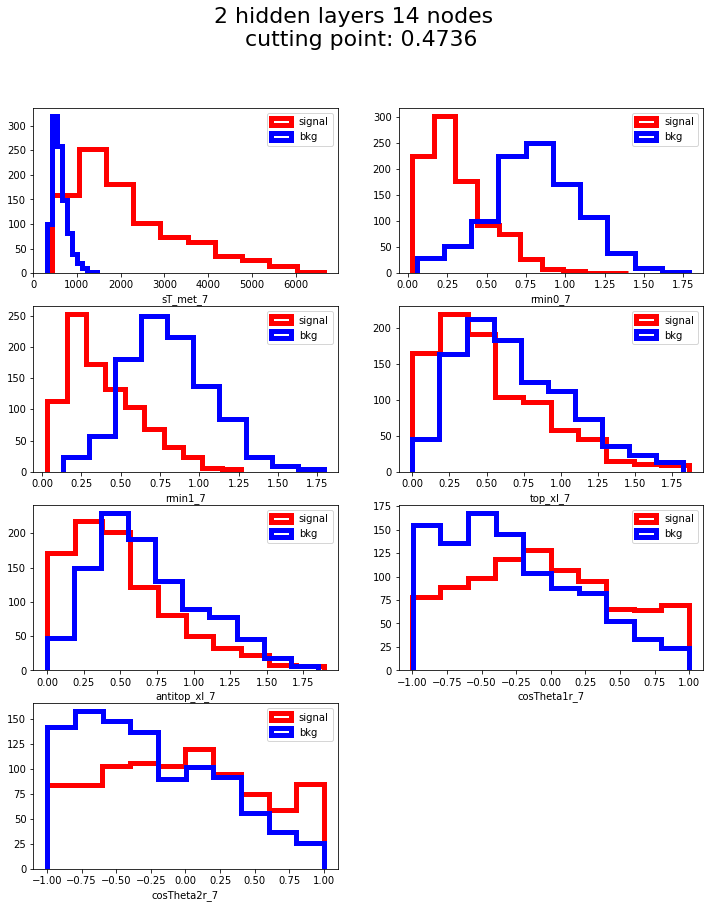

In [29]:

fig, ax = plt.subplots(int(math.ceil(len(VARS)/2.0)), 2, figsize=(12,14))
if len(VARS)%2 == 1 :  
    fig.delaxes(ax[int(math.ceil(len(VARS)/2.0))-1,1])
plt.suptitle('2 hidden layers 14 nodes \n cutting point: 0.4736',fontsize=22)

for i in range(len(VARS)):
    ax = plt.subplot(int(math.ceil(len(VARS)/2.0)), 2, i+1)
    plt.hist( df_all[df_all['model_2l_2f_predicted'] >= case1_cut][VARS[i]],  histtype='step',linewidth=5,
             label='signal',color='red')
    plt.hist( df_all[df_all['model_2l_2f_predicted'] < case1_cut][VARS[i]],  histtype='step',linewidth=5,
             label='bkg',color='blue')    
    ax.set_xlabel(VARS[i])
    ax.legend(loc="upper right")
        

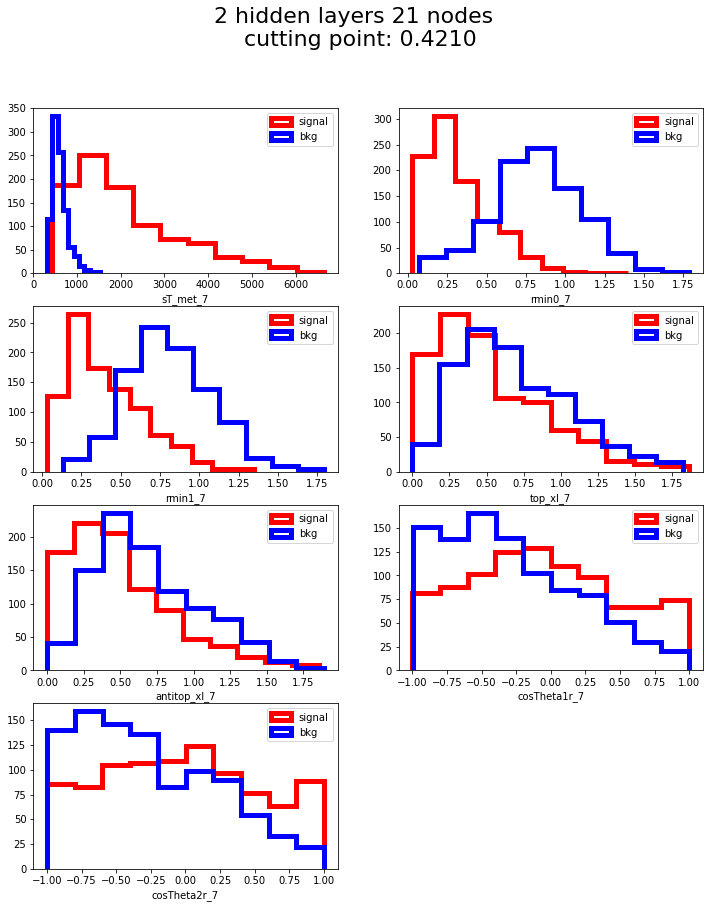

In [30]:
fig, ax = plt.subplots(int(math.ceil(len(VARS)/2.0)), 2, figsize=(12,14))
if len(VARS)%2 == 1 :  
    fig.delaxes(ax[int(math.ceil(len(VARS)/2.0))-1,1])
plt.suptitle('2 hidden layers 21 nodes \n cutting point: 0.4210',fontsize=22)

for i in range(len(VARS)):
    ax = plt.subplot(int(math.ceil(len(VARS)/2.0)), 2, i+1)
    plt.hist( df_all[df_all['model_2l_3f_predicted'] >=case2_cut][VARS[i]],  histtype='step',linewidth=5,
             label='signal',color='red')
    plt.hist( df_all[df_all['model_2l_3f_predicted'] <case2_cut][VARS[i]],  histtype='step',linewidth=5,
             label='bkg',color='blue')    
    ax.set_xlabel(VARS[i])
    ax.legend(loc="upper right")
        

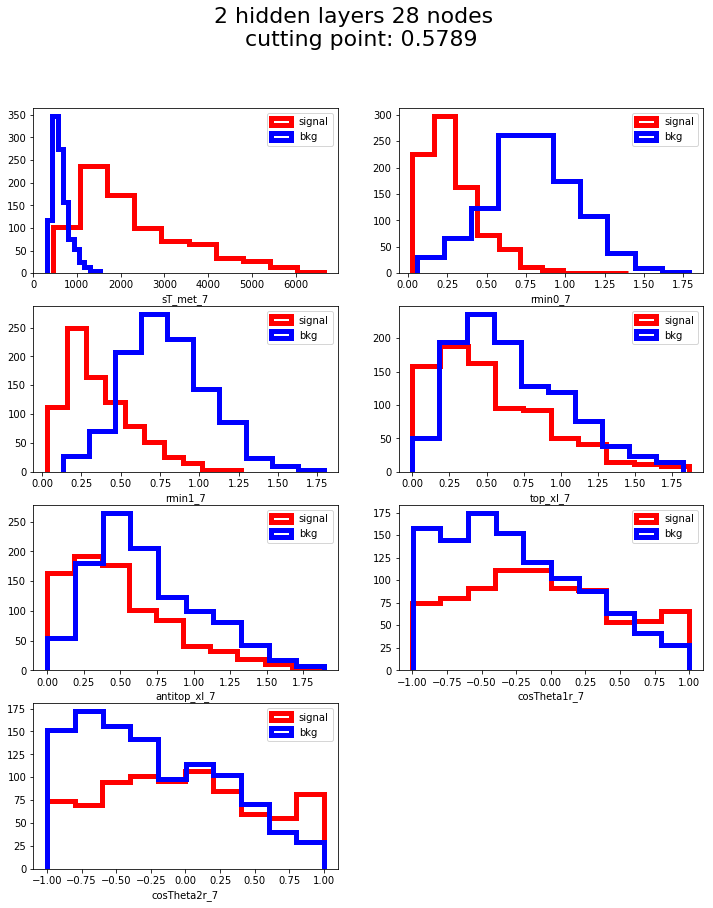

In [31]:
fig, ax = plt.subplots(int(math.ceil(len(VARS)/2.0)), 2, figsize=(12,14))
if len(VARS)%2 == 1 :  
    fig.delaxes(ax[int(math.ceil(len(VARS)/2.0))-1,1])
plt.suptitle('2 hidden layers 28 nodes \n cutting point: 0.5789',fontsize=22)

for i in range(len(VARS)):
    ax = plt.subplot(int(math.ceil(len(VARS)/2.0)), 2, i+1)
    plt.hist( df_all[df_all['model_2l_4f_predicted'] >=case3_cut][VARS[i]],  histtype='step',linewidth=5,
             label='signal',color='red')
    plt.hist( df_all[df_all['model_2l_4f_predicted'] <case3_cut][VARS[i]],  histtype='step',linewidth=5,
             label='bkg',color='blue')    
    ax.set_xlabel(VARS[i])
    ax.legend(loc="upper right")
        